In [11]:
import pandas as pd
df=pd.read_csv("Salary.csv")
df.head()

,Company,Job,Degree,100k-salary
0,google,sales-excutive,bachelors,0
1,google,sales-excutive,master,0
2,google,buisness manager,bachelors,1
3,google,buisness manager,master,1
4,google,computer programmer,bachelors,0


In [13]:
with open("Salary.csv","rb")as f:
    df1=f.read()

In [14]:
df1

b'Company,Job,Degree,100k-salary\r\ngoogle,sales-excutive,bachelors,0\r\ngoogle,sales-excutive,master,0\r\ngoogle,buisness manager,bachelors,1\r\ngoogle,buisness manager,master,1\r\ngoogle,computer programmer,bachelors,0\r\ngoogle,computer programmer,master,1\r\nMicrosoft,sales-excutive,master,0\r\nMicrosoft,computer programmer,bachelors,0\r\nMicrosoft,buisness manager,bachelors,0\r\nMicrosoft,buisness manager,master,1\r\nFaceboook,sales-excutive,bachelors,1\r\nFaceboook,sales-excutive,master,1\r\nFaceboook,buisness manager,bachelors,1\r\nFaceboook,buisness manager,master,1\r\nFaceboook,computer programmer,bachelors,1\r\nFaceboook,computer programmer,master,1\r\n'

In [47]:
X=df.drop("100k-salary",axis="columns")
y=df["100k-salary"]

In [48]:
X.head(6)

,Company,Job,Degree
0,google,sales-excutive,bachelors
1,google,sales-excutive,master
2,google,buisness manager,bachelors
3,google,buisness manager,master
4,google,computer programmer,bachelors
5,google,computer programmer,master


In [18]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

X["l_Company"]=label.fit_transform(X["Company"])
X["l_Job"]=label.fit_transform(X["Job"])
X["l_Degree"]=label.fit_transform(X["Degree"])

In [21]:
X


,Company,Job,Degree,l_Company,l_Job,l_Degree
0,google,sales-excutive,bachelors,2,2,0
1,google,sales-excutive,master,2,2,1
2,google,buisness manager,bachelors,2,0,0
3,google,buisness manager,master,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,master,2,1,1
6,Microsoft,sales-excutive,master,1,2,1
7,Microsoft,computer programmer,bachelors,1,1,0
8,Microsoft,buisness manager,bachelors,1,0,0
9,Microsoft,buisness manager,master,1,0,1


In [24]:
X_n=X.drop(["Company","Job","Degree"],axis="columns")

In [25]:
X_n

,l_Company,l_Job,l_Degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,1,2,1
7,1,1,0
8,1,0,0
9,1,0,1


In [52]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
Tree=DecisionTreeClassifier()

In [27]:
from sklearn.model_selection import  train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_n,y,test_size=0.2,random_state=12)

In [30]:
X_train.shape

(12, 3)

In [56]:
Tree.fit(X_n,y)

DecisionTreeClassifier()

In [57]:
Tree.score(X_n,y)

1.0

In [58]:
Tree.predict([[1,1,1]])

c:\Users\annad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [59]:
X.columns

Index(['Company', 'Job', 'Degree'], dtype='object')

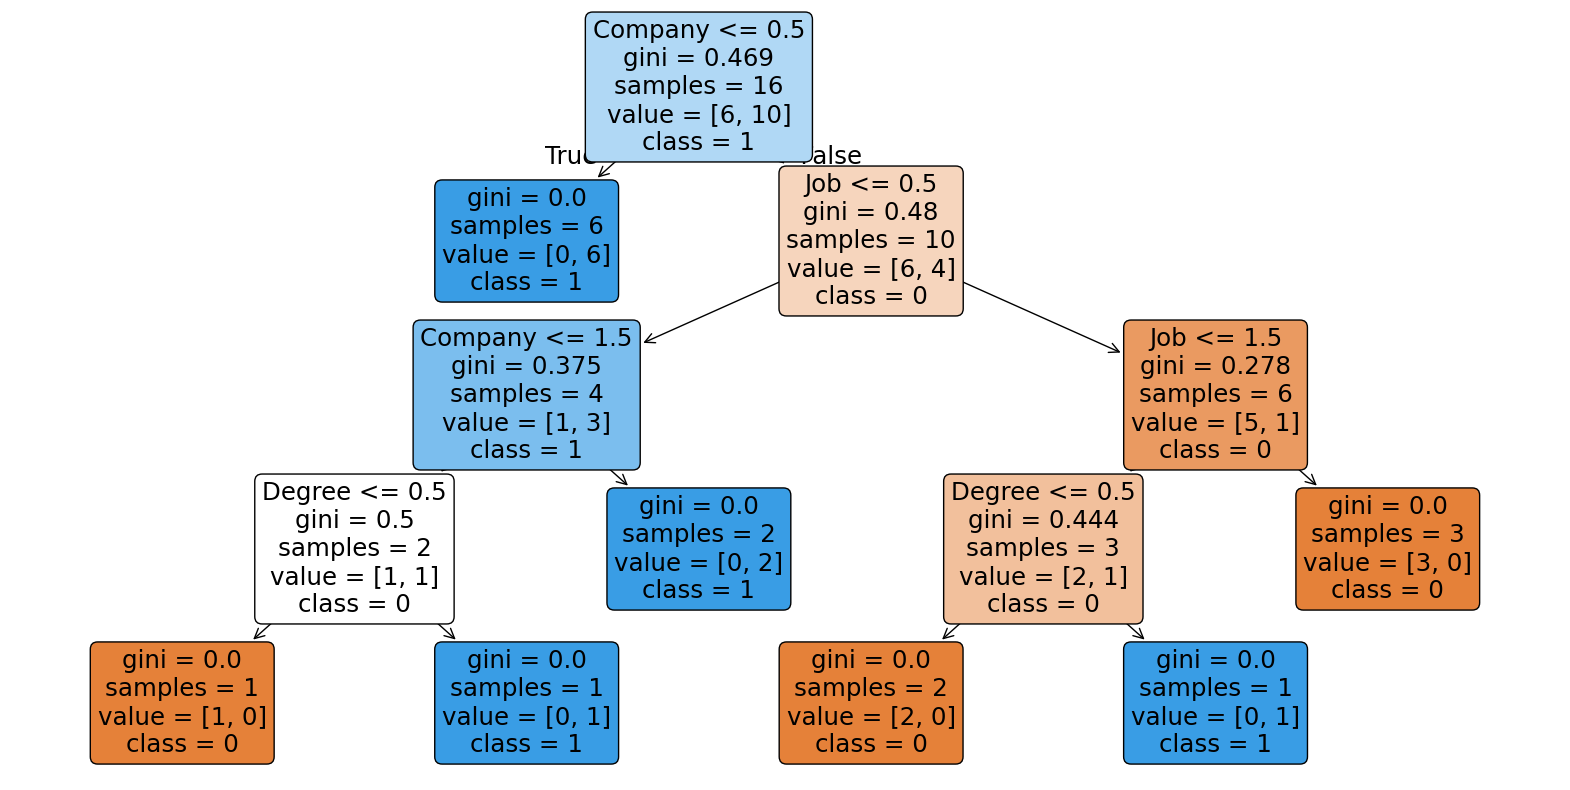

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    Tree,
    feature_names=df.columns,
    class_names=[str(cls) for cls in set(y)],
    filled=True,
    rounded=True
)
plt.show()

In [65]:
from joblib import dump , load

dump(Tree,"Decesiontree.pkl")

['Decesiontree.pkl']

In [66]:
s=load("Decesiontree.pkl")
s.predict([[1,1,1]])

c:\Users\annad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])